In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
dataset = pd.read_csv('../input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv')
dataset.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1048575, 26)

In [4]:
dataset.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [6]:
dataset.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],inplace=True,axis=1)

In [7]:
dataset.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [8]:
dataset['payment_method']

0          cod
1          cod
2          cod
3          cod
4          cod
          ... 
1048570    NaN
1048571    NaN
1048572    NaN
1048573    NaN
1048574    NaN
Name: payment_method, Length: 1048575, dtype: object

# **Selecting Relatively more import Features for sale**

In [9]:
df=dataset[['item_id','status','created_at','price','qty_ordered','grand_total','category_name_1',
           'payment_method','Year','Month','Customer ID']]

In [10]:
df.head()

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,payment_method,Year,Month,Customer ID
0,211131.0,complete,7/1/2016,1950.0,1.0,1950.0,Women's Fashion,cod,2016.0,7.0,1.0
1,211133.0,canceled,7/1/2016,240.0,1.0,240.0,Beauty & Grooming,cod,2016.0,7.0,2.0
2,211134.0,canceled,7/1/2016,2450.0,1.0,2450.0,Women's Fashion,cod,2016.0,7.0,3.0
3,211135.0,complete,7/1/2016,360.0,1.0,60.0,Beauty & Grooming,cod,2016.0,7.0,4.0
4,211136.0,order_refunded,7/1/2016,555.0,2.0,1110.0,Soghaat,cod,2016.0,7.0,5.0


# **Handling Missing Values**

In [11]:
df.shape

(1048575, 11)

In [12]:
df.isnull().sum()

item_id            464051
status             464066
created_at         464051
price              464051
qty_ordered        464051
grand_total        464051
category_name_1    464215
payment_method     464051
Year               464051
Month              464051
Customer ID        464062
dtype: int64

In [13]:
df=df.dropna()
df.shape

(584334, 11)

# **Handling Categorical features**

In [14]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [15]:
df['status']=df['status'].replace('\\N',df['status'].mode()[0])
df['category_name_1']=df['category_name_1'].replace('\\N',df['category_name_1'].mode()[0])


In [16]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       'cod', 'pending', 'processing', 'payment_review'], dtype=object)

In [17]:
df['category_name_1'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education'], dtype=object)

In [18]:
df.isnull().sum()

item_id            0
status             0
created_at         0
price              0
qty_ordered        0
grand_total        0
category_name_1    0
payment_method     0
Year               0
Month              0
Customer ID        0
dtype: int64

In [19]:
df.describe()

,item_id,price,qty_ordered,grand_total,Year,Month,Customer ID
count,584334.000000,5.843340e+05,584334.000000,5.843340e+05,584334.000000,584334.000000,584334.000000
mean,565585.094636,6.350635e+03,1.294306,8.532702e+03,2017.043804,7.168741,45778.310401
std,200101.028771,1.495130e+04,3.988084,6.133065e+04,0.707260,3.486273,34411.455889
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,2016.000000,1.000000,1.000000
25%,394941.250000,3.600000e+02,1.000000,9.450025e+02,2017.000000,4.000000,13511.000000
50%,568291.500000,8.994000e+02,1.000000,1.960912e+03,2017.000000,7.000000,42846.000000
75%,738976.750000,4.089750e+03,1.000000,6.999000e+03,2018.000000,11.000000,73512.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,2018.000000,12.000000,115326.000000


## **Checking Number of sales when price of product <= 900**

In [20]:
no_of_sales=df[df['price']<= 900].shape[0]
print(f'No of sales when price of product was less then or equal to 900:  {(no_of_sales/df.shape[0])*100:.2f}%')

No of sales when price of product was less then or equal to 900:  50.24%


### **What is the most popular Payment method**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# making easypay,easpay_MA and easpay_voucher one category easypay
df['payment_method']=df['payment_method'].str.replace('Easypay_MA','Easypay')
df['payment_method']=df['payment_method'].str.replace('easypay_voucher','Easypay')

In [23]:
x=df.groupby(['payment_method']).size().sort_values(ascending=False)
x

payment_method
cod                  271790
Easypay              128094
Payaxis               97640
jazzwallet            35145
bankalfalah           23057
jazzvoucher           15633
customercredit         7554
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
dtype: int64

In [24]:
df['payment_method']

0                 cod
1                 cod
2                 cod
3                 cod
4                 cod
             ...     
584519            cod
584520    bankalfalah
584521    bankalfalah
584522    bankalfalah
584523    bankalfalah
Name: payment_method, Length: 584334, dtype: object

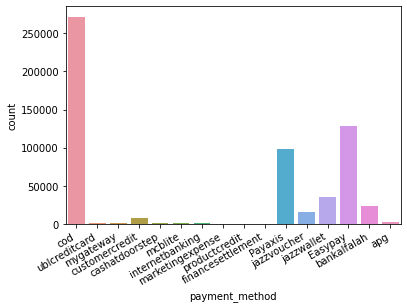

In [25]:
chart = sns.countplot(x=df['payment_method'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

The most popular payment methods are Cash on deleivery and Easypay


# **Question No 2. What does customers do wether they complete order or not?**

In [26]:
df['status'].value_counts()

complete          233688
canceled          201136
received           77284
order_refunded     59500
refund              8028
cod                 2855
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
Name: status, dtype: int64

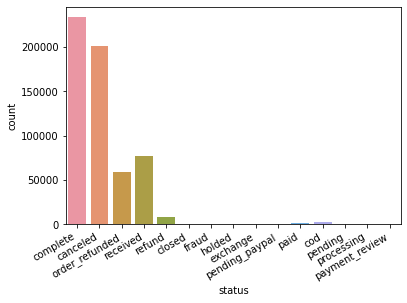

In [27]:
chart = sns.countplot(x=df['status'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### **What is the most In demand Item in Pakistan**

We can clear see below that Mobiles & Tablets are the most in demand category in Pakistan other then that Men's and 
Women's Fashion products are also in demnad

In [28]:
df['category_name_1'].value_counts()

Mobiles & Tablets     123559
Men's Fashion          92218
Women's Fashion        59720
Appliances             52413
Superstore             43611
Beauty & Grooming      41493
Soghaat                34011
Others                 29208
Home & Living          26504
Entertainment          26325
Health & Sports        17502
Kids & Baby            16489
Computing              15933
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

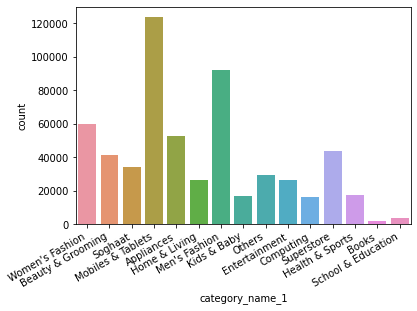

In [29]:
chart = sns.countplot(x=df['category_name_1'])

chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# **Question no 4: Which item in category is more profitable?**

You can see below that "Mobile & Tablets", "Appliances" and "Beauty & Grooming" products are most proftable

In [30]:
profits=df[['category_name_1','price']].groupby(['category_name_1'])['price'].sum()
profits.sort_values(ascending=False)

category_name_1
Mobiles & Tablets     2.062652e+09
Appliances            5.796058e+08
Entertainment         5.069271e+08
Computing             1.734281e+08
Women's Fashion       1.049944e+08
Men's Fashion         8.370213e+07
Others                6.497009e+07
Beauty & Grooming     3.648696e+07
Home & Living         2.997186e+07
Superstore            2.662173e+07
Health & Sports       1.784777e+07
Kids & Baby           1.109623e+07
Soghaat               1.000656e+07
School & Education    1.676904e+06
Books                 9.043140e+05
Name: price, dtype: float64

In [31]:
df['category_name_1']

0           Women's Fashion
1         Beauty & Grooming
2           Women's Fashion
3         Beauty & Grooming
4                   Soghaat
                ...        
584519      Women's Fashion
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category_name_1, Length: 584334, dtype: object

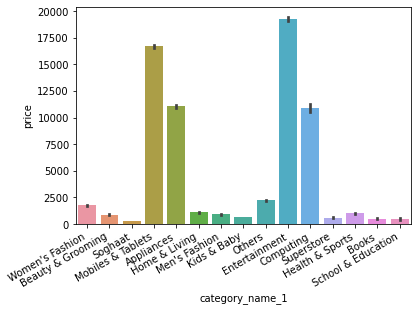

In [32]:
bar= sns.barplot(x=df['category_name_1'],y=df['price'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [33]:
df['price'].unique().shape

(9119,)